In [ ]:
# Importing the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the dataset:
df = pd.read_csv('Walmart (1).csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
#checking the shape of the data:
df.shape

(6435, 8)

In [ ]:
#checking the columns dtypes and counts:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
#checking for null values:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
#checking for duplicates:
df.duplicated().sum()

0

In [ ]:
#checking the stats of the data:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


#Analysing the features:

In [ ]:
#1.Store:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

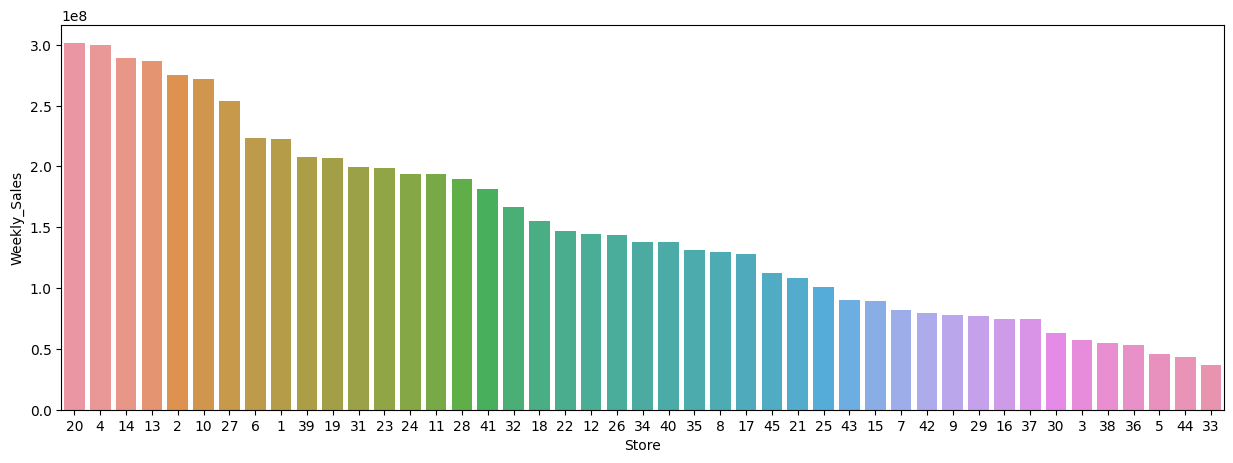

In [ ]:
plt.figure(figsize=(15,5))
x = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x=x['Store'],y=x['Weekly_Sales'],order=x['Store'])

- Store no. 20 has the highest weekly sale.

In [ ]:
#2. Date:
df['Date'].unique()

array(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010',
       '05-03-2010', '12-03-2010', '19-03-2010', '26-03-2010',
       '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010',
       '30-04-2010', '07-05-2010', '14-05-2010', '21-05-2010',
       '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010',
       '25-06-2010', '02-07-2010', '09-07-2010', '16-07-2010',
       '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
       '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010',
       '17-09-2010', '24-09-2010', '01-10-2010', '08-10-2010',
       '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010',
       '12-11-2010', '19-11-2010', '26-11-2010', '03-12-2010',
       '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010',
       '07-01-2011', '14-01-2011', '21-01-2011', '28-01-2011',
       '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
       '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011',
       '01-04-2011', '08-04-2011', '15-04-2011', '22-04

In [ ]:
# converting the data type of date column to datetime:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['Date']

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [ ]:
# Extracting day,month and year from date column:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


- The data set contains sale of every week from 'saturday to friday' with total sale calculated on every friday.

<Axes: xlabel='Month'>

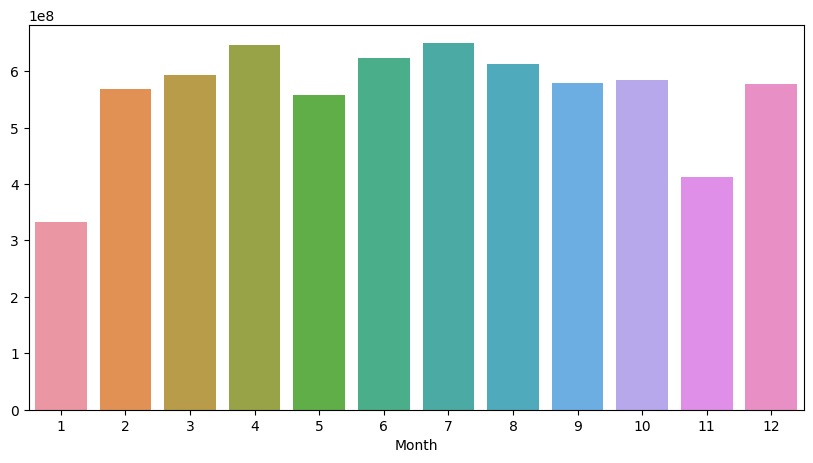

In [ ]:
#checking the months with the highest sale in a year:
plt.figure(figsize=(10,5))
x = df.groupby('Month')['Weekly_Sales'].sum()
sns.barplot(x=x.index,y=x.values)

- the sale is higher in the month of APRIL and JULY.

<Axes: xlabel='Year'>

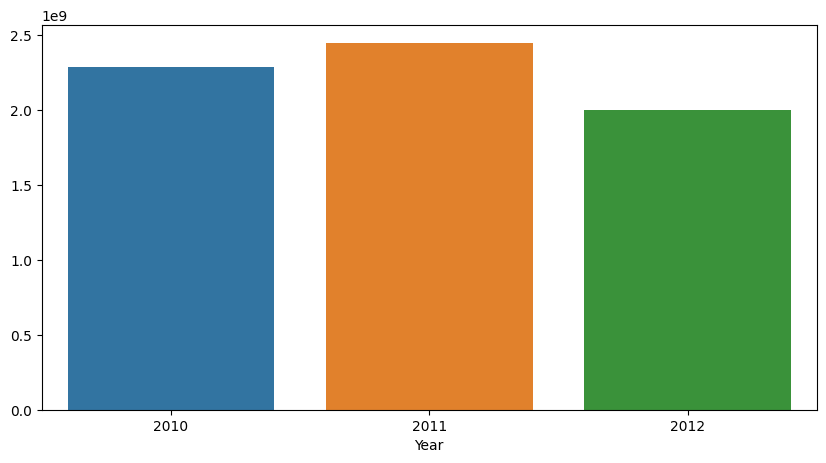

In [ ]:
#checking the year with the highest sale throughout the year:
plt.figure(figsize=(10,5))
x = df.groupby('Year')['Weekly_Sales'].sum()
sns.barplot(x=x.index,y=x.values)

- the sale increased in the year 2011 and decreased in 2012.

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

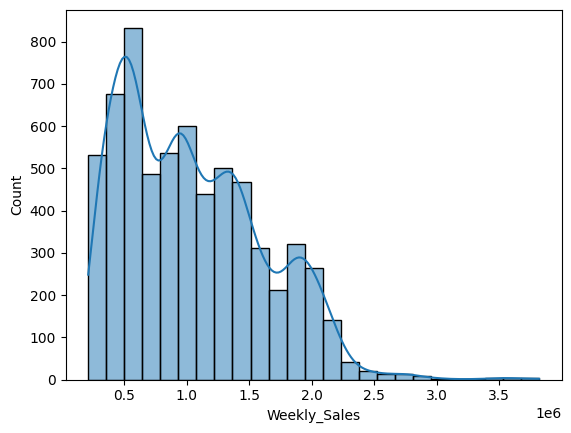

In [ ]:
#3. Weekly_Sales:
sns.histplot(df['Weekly_Sales'],kde=True,bins=25)

In [ ]:
df['Weekly_Sales'].skew()

0.6683617974864524

- The weekly_sales column is a right skewed data.

In [ ]:
#4. Holiday Flag:
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

<Axes: xlabel='Holiday_Flag', ylabel='count'>

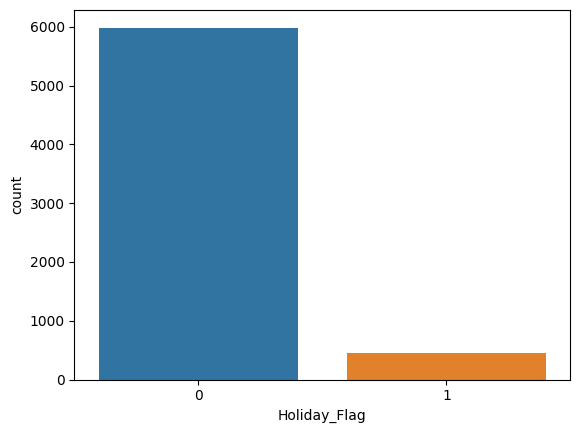

In [ ]:
# plotting the values:
sns.countplot(data=df,x='Holiday_Flag')

- The majority of data in the Holiday_Flag column contains value as 0.

In [ ]:
#5.Temperature:
df['Temperature'].unique()

array([42.31, 38.51, 39.93, ..., 75.87, 77.55, 74.09])

<Axes: xlabel='Temperature', ylabel='Count'>

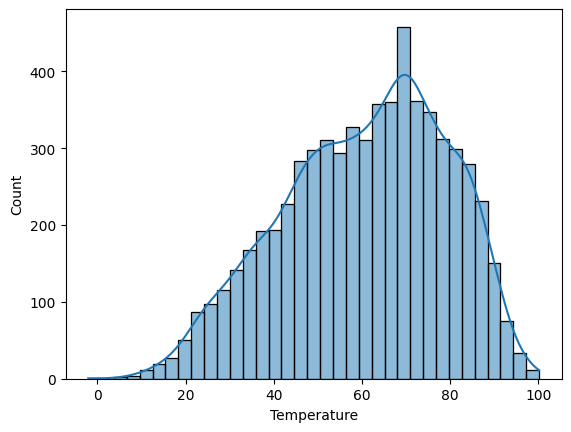

In [ ]:
sns.histplot(df['Temperature'],kde=True)

- The Temperature column is kind of normally distributed.

In [ ]:
#6.Fuel_Price
df['Fuel_Price'].unique()

array([2.572, 2.548, 2.514, 2.561, 2.625, 2.667, 2.72 , 2.732, 2.719,
       2.77 , 2.808, 2.795, 2.78 , 2.835, 2.854, 2.826, 2.759, 2.705,
       2.668, 2.637, 2.653, 2.669, 2.642, 2.623, 2.608, 2.64 , 2.627,
       2.692, 2.664, 2.619, 2.577, 2.565, 2.582, 2.624, 2.603, 2.633,
       2.725, 2.716, 2.689, 2.728, 2.771, 2.735, 2.708, 2.843, 2.869,
       2.886, 2.943, 2.976, 2.983, 3.016, 3.01 , 2.989, 3.022, 3.045,
       3.065, 3.288, 3.459, 3.488, 3.473, 3.524, 3.622, 3.743, 3.807,
       3.81 , 3.906, 3.899, 3.907, 3.786, 3.699, 3.648, 3.637, 3.594,
       3.48 , 3.575, 3.651, 3.682, 3.684, 3.638, 3.554, 3.523, 3.533,
       3.546, 3.526, 3.467, 3.355, 3.285, 3.274, 3.353, 3.372, 3.332,
       3.297, 3.308, 3.236, 3.172, 3.158, 3.159, 3.112, 3.129, 3.157,
       3.261, 3.268, 3.29 , 3.36 , 3.409, 3.51 , 3.555, 3.63 , 3.669,
       3.734, 3.787, 3.845, 3.891, 3.877, 3.814, 3.749, 3.688, 3.561,
       3.501, 3.452, 3.393, 3.346, 3.286, 3.227, 3.256, 3.311, 3.407,
       3.417, 3.494,

<Axes: xlabel='Fuel_Price', ylabel='Count'>

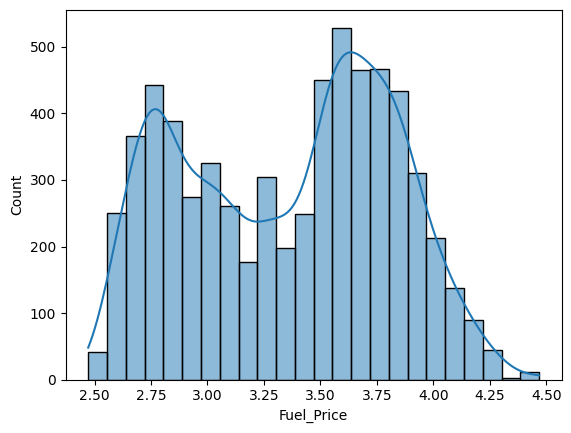

In [ ]:
sns.histplot(df['Fuel_Price'],kde=True)

- The Fuel_Price columns follows a bimodal distribution.

In [ ]:
#7.CPI
df['CPI'].unique()

array([211.0963582, 211.2421698, 211.2891429, ..., 214.6772833,
       214.7212488, 214.7415392])

<Axes: xlabel='CPI', ylabel='Count'>

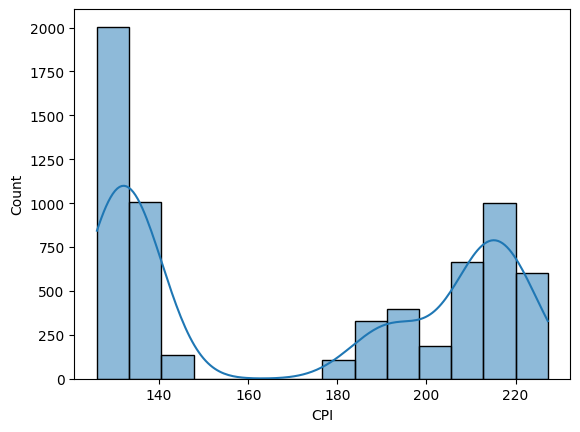

In [ ]:
sns.histplot(df['CPI'],kde=True)

- As we can conclude there are no values between 150 & 175 and maximum values lies between 125 & 130.

In [ ]:
#8. Unemployment
df['Unemployment'].unique()

array([ 8.106,  7.808,  7.787,  7.838,  7.742,  7.682,  7.962,  7.866,
        7.348,  7.143,  6.908,  6.573,  8.324,  8.2  ,  8.099,  8.163,
        8.028,  7.931,  7.852,  7.441,  7.057,  6.891,  6.565,  6.17 ,
        7.368,  7.343,  7.346,  7.564,  7.551,  7.574,  7.567,  7.197,
        6.833,  6.664,  6.334,  6.034,  8.623,  7.896,  7.372,  7.127,
        6.51 ,  5.946,  5.644,  5.143,  4.607,  4.308,  4.077,  3.879,
        6.566,  6.465,  6.496,  6.768,  6.634,  6.489,  6.529,  6.3  ,
        5.943,  5.801,  5.603,  5.422,  7.259,  7.092,  6.973,  7.007,
        6.858,  6.855,  6.925,  6.551,  6.132,  5.964,  5.668,  5.329,
        9.014,  8.963,  9.017,  9.137,  8.818,  8.595,  8.622,  8.513,
        8.256,  8.09 ,  7.872,  7.557,  6.299,  6.29 ,  6.315,  6.433,
        6.262,  6.297,  6.425,  6.123,  5.825,  5.679,  5.401,  5.124,
        6.415,  6.384,  6.442,  6.56 ,  6.416,  6.38 ,  6.404,  6.054,
        5.667,  5.539,  5.277,  4.954,  9.765,  9.524,  9.199,  9.003,
      

<Axes: xlabel='Unemployment', ylabel='Count'>

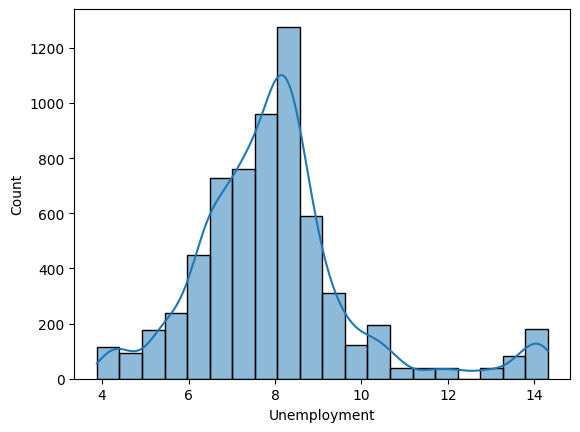

In [ ]:
sns.histplot(df['Unemployment'],kde=True,bins=20)

- The distribution is kind of normal.

<ipython-input-28-74164b436b90>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

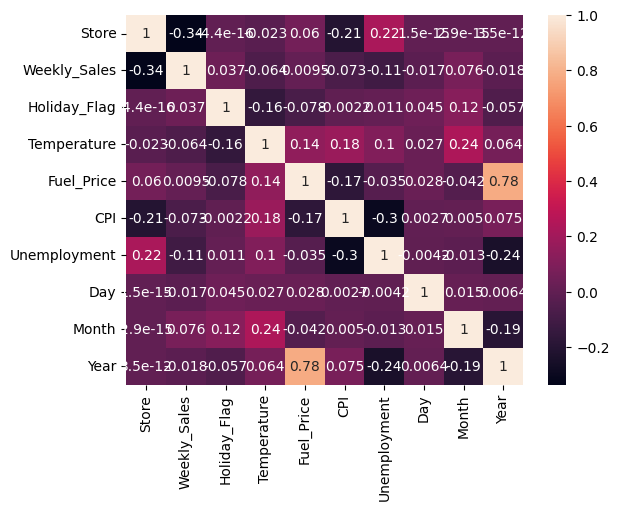

In [ ]:
#checking the co-relations br=etween columns:
sns.heatmap(df.corr(),annot=True)

#Building the time-series model to forecast the sales for the next 12 weeks. 

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [ ]:
#keeping the required columns(date,weekly sales):
sale_df = df[['Date','Weekly_Sales']]
sale_df.head()

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68


<Axes: >

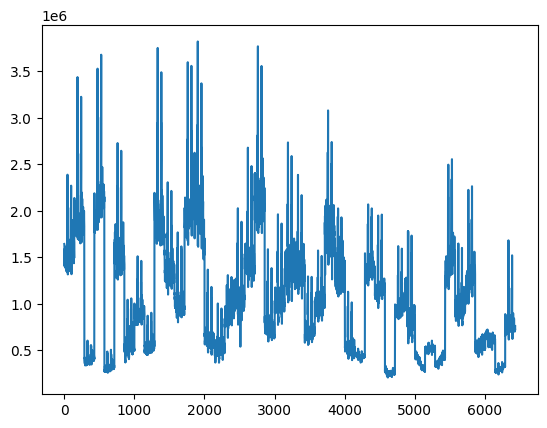

In [ ]:
sale_df['Weekly_Sales'].plot()

In [ ]:
sale_df.shape

(6435, 2)

In [ ]:
sale_df = sale_df.set_index('Date')

In [ ]:
sale_df.head()

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68


<Axes: xlabel='Date'>

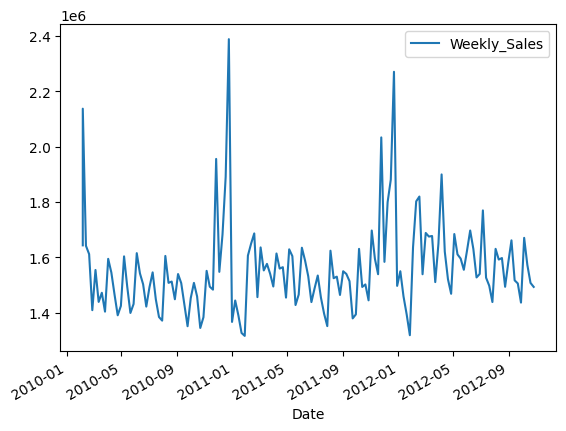

In [ ]:
sale_df.iloc[:144].plot()

In [ ]:
# testing the stationarity in the data:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(sale_df['Weekly_Sales'])
test_result

(-4.624149498578306,
 0.00011655869699901148,
 34,
 6400,
 {'1%': -3.4313721757424656,
  '5%': -2.8619917128968813,
  '10%': -2.5670104435791017},
 171522.33418043077)

In [ ]:
#defining a function to test whether the data is stationary or not:
# H0 = data is not stationary
# H1 = data is stationary

def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADF test statitic','p-value','#Lags used','# of observations used']
  for value,label in zip(result,labels):
    print(label+': '+str(value))
  if result[1] <= 0.05:
    print('data is stationary')
  else:
    print('data is not stationary')

In [ ]:
adfuller_test(sale_df['Weekly_Sales'])

ADF test statitic: -4.624149498578306
p-value: 0.00011655869699901148
#Lags used: 34
# of observations used: 6400
data is stationary


- As per the adfuller test, the data is staionary and hence no differencing is needed.

In [ ]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

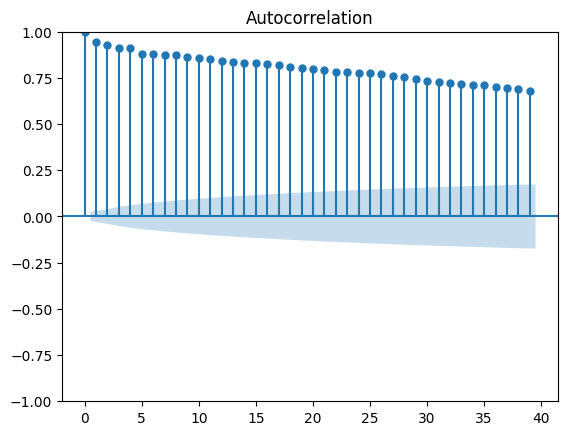

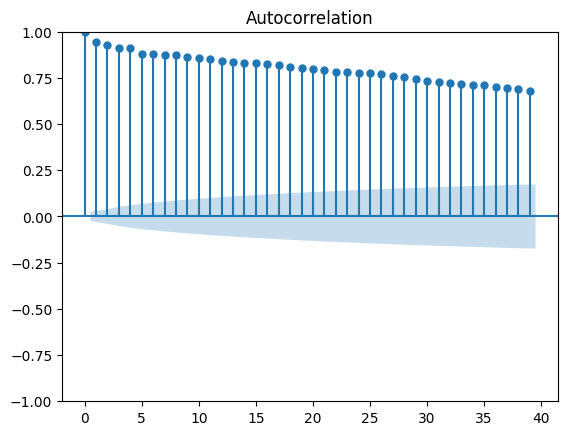

In [ ]:
plot_acf(sale_df['Weekly_Sales'])

In [ ]:
#installing pmdarima
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.4 MB/s eta 0:00:00


In [ ]:
#importing autoarima
from pmdarima import auto_arima

In [ ]:
order = auto_arima(sale_df['Weekly_Sales'],trace=True)
order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=173103.554, Time=4.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=174457.419, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=173626.224, Time=0.77 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=173359.721, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=174455.423, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=173301.748, Time=3.89 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=173266.524, Time=5.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=172741.309, Time=10.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=172905.020, Time=9.82 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=172730.428, Time=21.58 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=172847.176, Time=4.16 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=172588.751, Time=19.55 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=172597.113, Time=6.59 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=172572.018, Time=12.12 sec
 

ARIMA(order=(4, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
#importing the arima model
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
sale_df.shape

(6435, 1)

In [ ]:
#splitting the dataset in train and test:
train_df = sale_df.iloc[:5000]['Weekly_Sales']
test_df = sale_df.iloc[5000:]['Weekly_Sales']

In [ ]:
model = ARIMA(train_df,order=(4,1,5))
model_fit = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                 5000
Model:                 ARIMA(4, 1, 5)   Log Likelihood              -67395.976
Date:                Fri, 21 Apr 2023   AIC                         134811.951
Time:                        05:43:43   BIC                         134877.121
Sample:                             0   HQIC                        134834.792
                               - 5000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1566      0.052     -3.007      0.003      -0.259      -0.055
ar.L2         -0.2010      0.058     -3.464      0.001      -0.315      -0.087
ar.L3         -0.0681      0.061     -1.125      0.261      -0.187       0.051
ar.L4          0.1234      0.050      2.459      0.014       0.025       0.222
ma.L1         -0.2252      0.053     -4.277      0.000      -0.328      -0.122
ma.L2          0.0734      0.053      1.380      0.168      -0.031       0.178
ma.L3         -0.1564      0.052     -3.020      0.003      -0.258      -0.055
ma.L4          0.0651      0.041      1.606      0.108      -0.014       0.145
ma.L5         -0.2703      0.034     -8.023      0.000      -0.336      -0.204
sigma2      3.013e+10   5.25e-12   5.74e+21      0.000    3.01e+10    3.01e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             65439.95
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.78e+36. Standard errors may be unstable.
"""

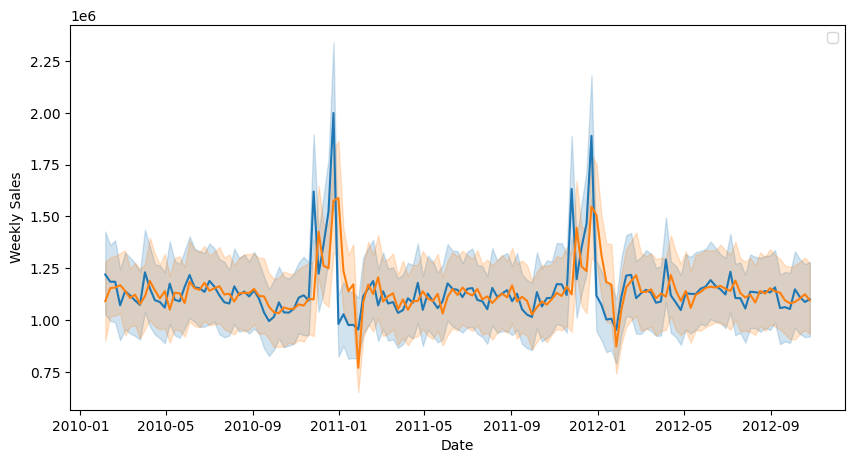

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(train_df)
sns.lineplot(model_fit.fittedvalues)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [ ]:
fcast = model_fit.predict(start=len(train_df), end=len(train_df)+len(test_df)-1)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
print('MAE:',mean_absolute_error(test_df,fcast))
print('MSE:',mean_squared_error(test_df,fcast))

MAE: 353559.5170426482
MSE: 163646637218.6241


#Using FBProphet

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
# extracting the required columns from original data:
new_df = df[['Date','Weekly_Sales']]
new_df.head()

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68


In [ ]:
#renaming the columns fro prophet model:
new_df.columns = ['ds','y']
new_df

,ds,y
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
...,...,...
6430,2012-09-28,713173.95
6431,2012-10-05,733455.07
6432,2012-10-12,734464.36
6433,2012-10-19,718125.53


In [ ]:
# converting ds datatype to datetime
new_df['ds'] = pd.to_datetime(new_df['ds'],dayfirst=True)
new_df.head()

<ipython-input-58-eac020aca8d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ds'] = pd.to_datetime(new_df['ds'],dayfirst=True)


,ds,y
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68


In [ ]:
#initialzing the model:
model = Prophet(interval_width=0.95)

In [ ]:
#fitting the model:
model.fit(new_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4i3lu_qz/z5j30qoy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4i3lu_qz/prvcg0oq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28126', 'data', 'file=/tmp/tmp4i3lu_qz/z5j30qoy.json', 'init=/tmp/tmp4i3lu_qz/prvcg0oq.json', 'output', 'file=/tmp/tmp4i3lu_qz/prophet_modelq56qowvy/prophet_model-20230421063319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:33:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:33:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#checking the components:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
#checking the last date in the data:
new_df.tail()

,ds,y
6430,2012-09-28,713173.95
6431,2012-10-05,733455.07
6432,2012-10-12,734464.36
6433,2012-10-19,718125.53
6434,2012-10-26,760281.43


In [ ]:
#creating future dates:
future_dates = model.make_future_dataframe(periods=84,freq='D') #for 12 weeks
future_dates.tail()

,ds
222,2013-01-14
223,2013-01-15
224,2013-01-16
225,2013-01-17
226,2013-01-18


In [ ]:
#predicting the values for the future dates:
prediction = model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,1.054198e+06,-2340.148036,2.150583e+06,1.054198e+06,1.054198e+06,15228.494620,15228.494620,15228.494620,15228.494620,15228.494620,15228.494620,0.0,0.0,0.0,1.069427e+06
1,2010-02-12,1.053875e+06,-33539.462824,2.178110e+06,1.053875e+06,1.053875e+06,30133.363601,30133.363601,30133.363601,30133.363601,30133.363601,30133.363601,0.0,0.0,0.0,1.084009e+06
2,2010-02-19,1.053553e+06,-38887.571734,2.156124e+06,1.053553e+06,1.053553e+06,-693.995035,-693.995035,-693.995035,-693.995035,-693.995035,-693.995035,0.0,0.0,0.0,1.052859e+06
3,2010-02-26,1.053230e+06,-3488.215607,2.126518e+06,1.053230e+06,1.053230e+06,-27387.954162,-27387.954162,-27387.954162,-27387.954162,-27387.954162,-27387.954162,0.0,0.0,0.0,1.025842e+06
4,2010-03-05,1.052907e+06,-176878.051432,2.117288e+06,1.052907e+06,1.052907e+06,-33223.641173,-33223.641173,-33223.641173,-33223.641173,-33223.641173,-33223.641173,0.0,0.0,0.0,1.019684e+06


<Axes: xlabel='ds', ylabel='y'>

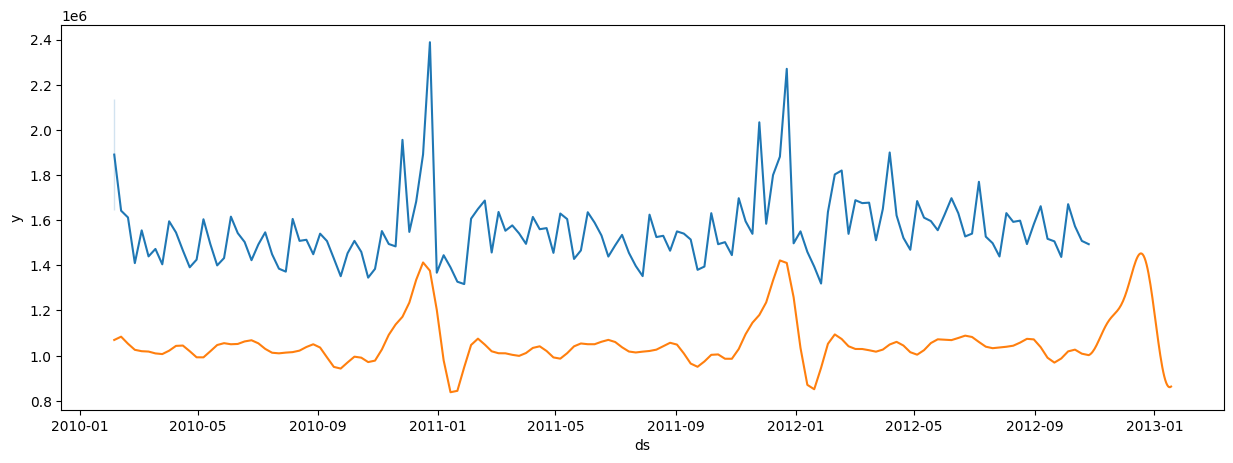

In [ ]:
X = new_df.iloc[:144]
plt.figure(figsize=(15,5))
sns.lineplot(x=X['ds'],y=X['y'])
sns.lineplot(x=prediction['ds'],y=prediction['yhat'])


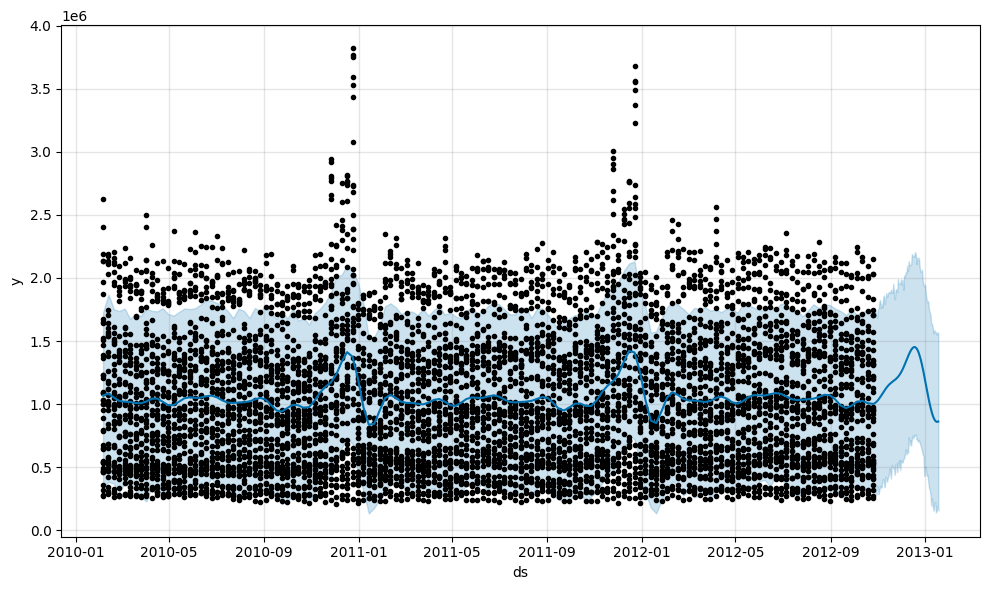

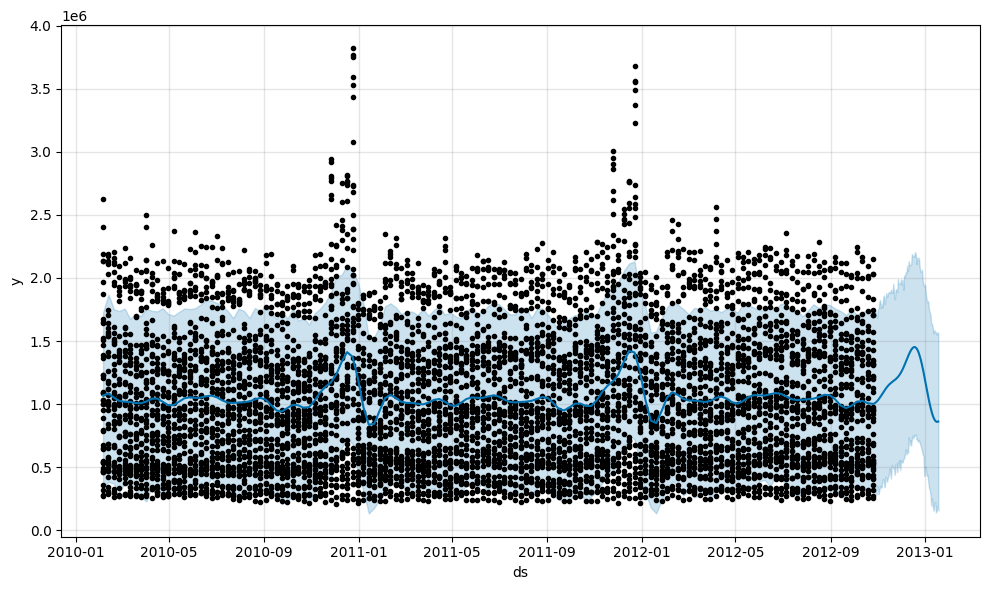

In [ ]:
#plotting the predictions:
model.plot(prediction)

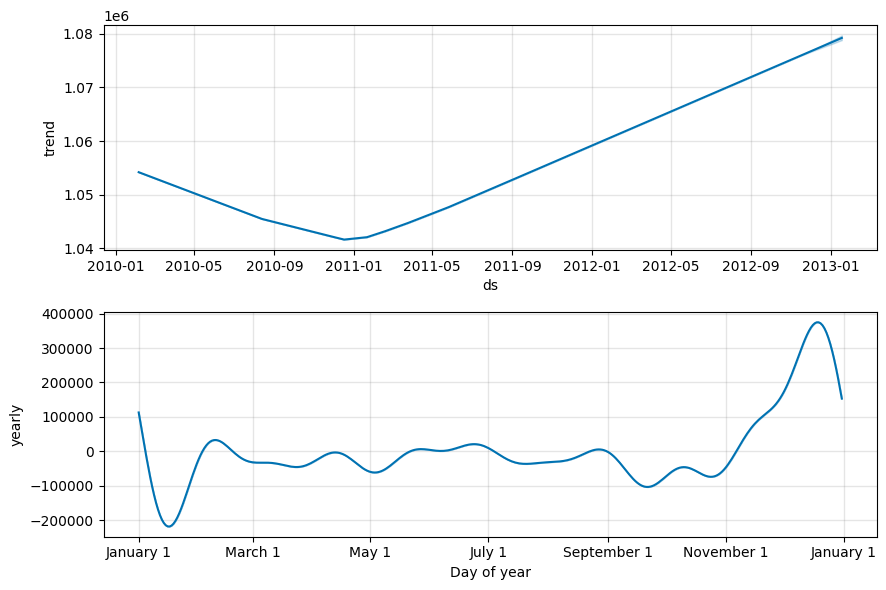

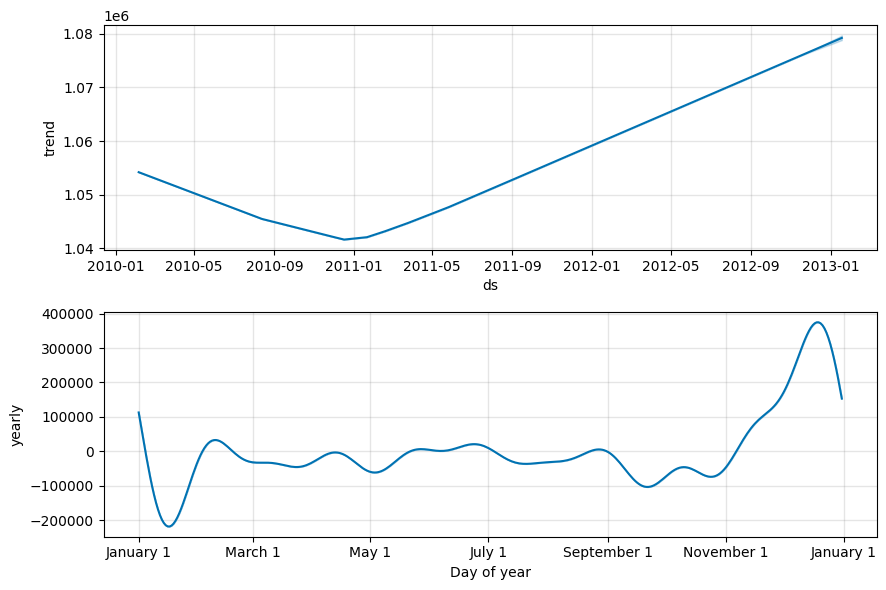

In [ ]:
#plotting the model components:
model.plot_components(prediction)

In [ ]:
# cross validating the model:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model,initial='84 days',period='5 days',horizon='20 days')
df_cv.head()

INFO:prophet:Making 179 forecasts with cutoffs between 2010-04-30 00:00:00 and 2012-10-06 00:00:00


  0%|          | 0/179 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4i3lu_qz/hhi1wbcj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4i3lu_qz/5o1mfm_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93993', 'data', 'file=/tmp/tmp4i3lu_qz/hhi1wbcj.json', 'init=/tmp/tmp4i3lu_qz/5o1mfm_5.json', 'output', 'file=/tmp/tmp4i3lu_qz/prophet_modelgo1ku989/prophet_model-20230421061831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:18:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:18:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4i3lu_qz/dz29k5rj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4i3lu_qz/dbo7qn8k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-05-07,988984.320214,285911.253434,1.690176e+06,1921432.16,2010-04-30
1,2010-05-07,988984.320214,239178.042927,1.720968e+06,399323.86,2010-04-30
2,2010-05-07,988984.320214,265244.354064,1.675759e+06,326870.13,2010-04-30
3,2010-05-07,988984.320214,281440.082803,1.652562e+06,843848.65,2010-04-30
4,2010-05-07,988984.320214,256418.133135,1.669481e+06,1566219.77,2010-04-30


In [ ]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
22990,2012-10-26,1.001197e+06,242745.840801,1.693250e+06,688940.94,2012-10-06
22991,2012-10-26,1.001197e+06,300724.039032,1.714690e+06,319550.77,2012-10-06
22992,2012-10-26,1.001197e+06,311909.802762,1.690912e+06,921264.52,2012-10-06
22993,2012-10-26,1.001197e+06,249212.289556,1.679924e+06,1127516.25,2012-10-06
22994,2012-10-26,1.001197e+06,275710.063242,1.723823e+06,760281.43,2012-10-06


In [ ]:
#importing performance metrics:
from prophet.diagnostics import performance_metrics

In [ ]:
#checking the performance:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,3.564237e+11,597012.321627,487473.043851,0.673022,0.419597,0.482463,0.777818
1,4 days,3.311857e+11,575487.319052,474676.270131,0.654675,0.412029,0.475432,0.784301
2,5 days,3.509521e+11,592412.078205,484414.795918,0.674225,0.421117,0.481189,0.782129
3,6 days,3.412366e+11,584154.620734,479853.525853,0.677847,0.422557,0.478188,0.786933
4,7 days,3.371423e+11,580639.537383,476726.171627,0.662474,0.420253,0.478560,0.790446


In [ ]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
13,16 days,4.039468e+11,635568.117509,509952.429735,0.691696,0.445878,0.522651,0.758145
14,17 days,4.259441e+11,652643.921163,522790.123932,0.715020,0.446625,0.531665,0.746875
15,18 days,4.112573e+11,641293.462977,512017.078591,0.672408,0.441222,0.514376,0.753372
16,19 days,4.192886e+11,647524.978528,515793.310185,0.664683,0.451928,0.528624,0.748139
17,20 days,3.836689e+11,619410.083087,505454.639016,0.680621,0.448892,0.516070,0.754699


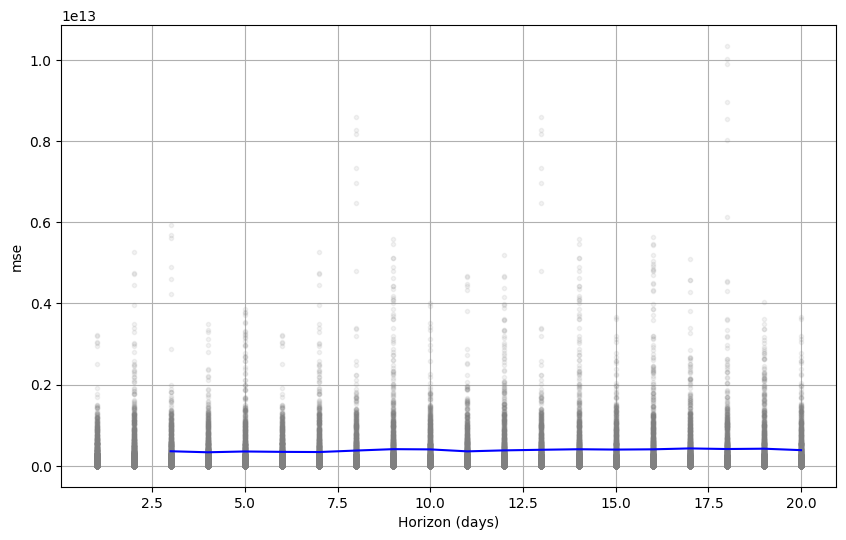

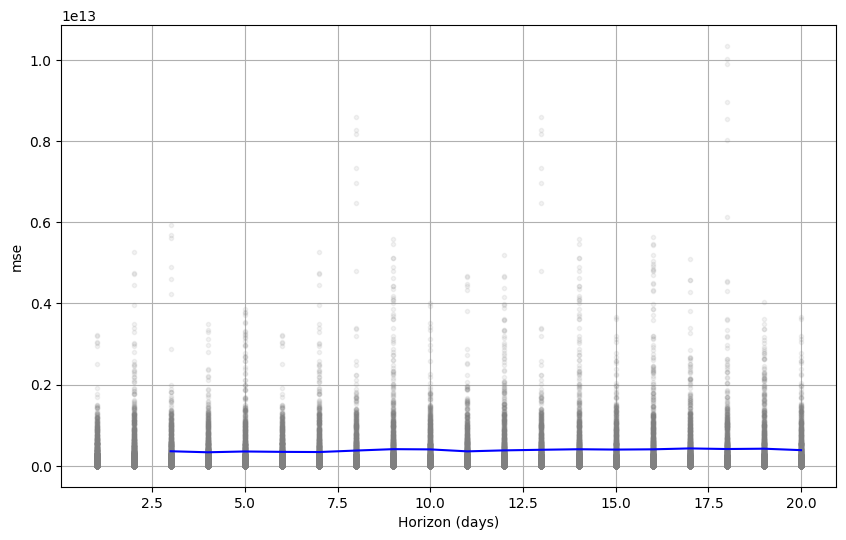

In [ ]:
#plotting the cv:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,metric='mse')

<Axes: xlabel='ds', ylabel='y'>

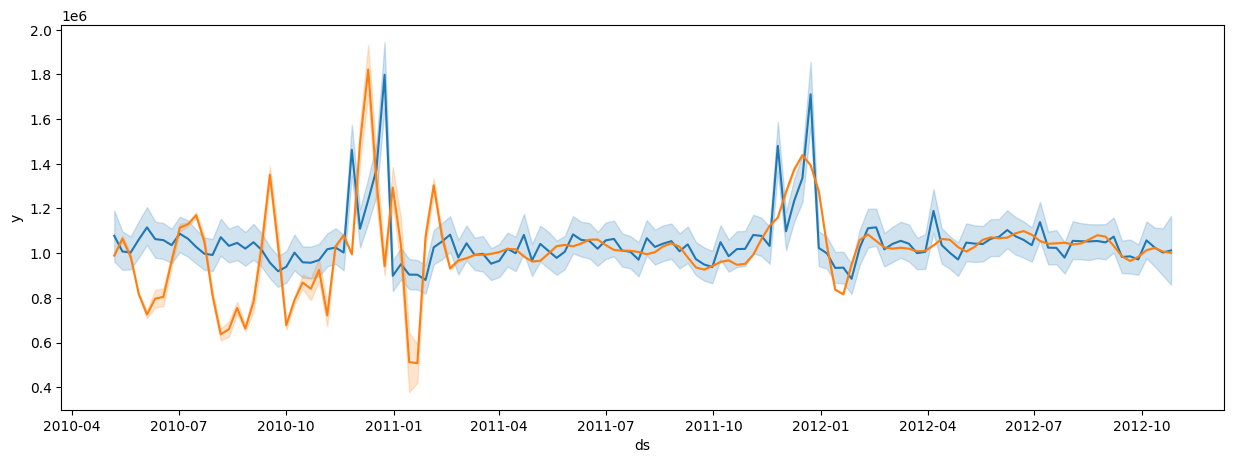

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df_cv['ds'],y=df_cv['y'])
sns.lineplot(x=df_cv['ds'],y=df_cv['yhat'])
